# Gene plots

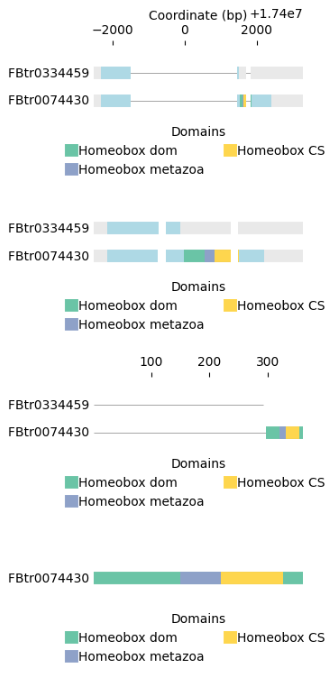

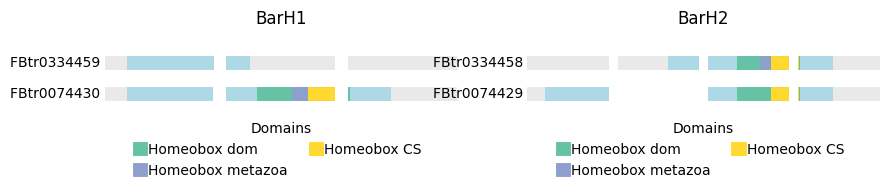

In [1]:
# ensembl_release=112
# species='homo sapiens'
# gene_id='ENSG00000141510'
# paralogs={
#     'p53':gene_id,
#     'p63':"ENSG00000073282",
#     'p73':"ENSG00000078900",
# }
# figh=5

# pyensembl install --release 100 --species drosophila_melanogaster
ensembl_release = 100
species = "drosophila melanogaster"
gene_id = "FBgn0011758"  # BarH1
paralogs = {
    "BarH1": gene_id,
    "BarH2": "FBgn0004854",
}
figh = 1
protein_coding = True

In [2]:
import matplotlib.pyplot as plt

In [3]:
## req.s
import os
res=os.system(f"pyensembl install --release {ensembl_release} --species {species.lower().replace(' ','_')}")
assert res==0

/home/rdandage/Documents/work/.venv/lib/python3.12/site-packages/pyensembl/shell.py:43: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


2025-10-28 17:01:57,605 - pyensembl.shell - INFO - Running 'install' for EnsemblRelease(release=100, species='drosophila_melanogaster')
2025-10-28 17:01:58,039 - pyensembl.sequence_data - INFO - Loaded sequence dictionary from /home/rdandage/.cache/pyensembl/BDGP6.28/ensembl100/Drosophila_melanogaster.BDGP6.28.cdna.all.fa.gz.pickle
2025-10-28 17:01:58,070 - pyensembl.sequence_data - INFO - Loaded sequence dictionary from /home/rdandage/.cache/pyensembl/BDGP6.28/ensembl100/Drosophila_melanogaster.BDGP6.28.ncrna.fa.gz.pickle
2025-10-28 17:01:58,180 - pyensembl.sequence_data - INFO - Loaded sequence dictionary from /home/rdandage/.cache/pyensembl/BDGP6.28/ensembl100/Drosophila_melanogaster.BDGP6.28.pep.all.fa.gz.pickle


## test

/home/rdandage/Documents/work/chrov/.venv/lib/python3.10/site-packages/sorted_nearest/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


CPU times: user 2 s, sys: 315 ms, total: 2.31 s
Wall time: 2.22 s


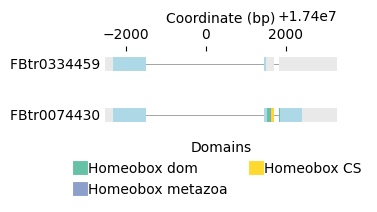

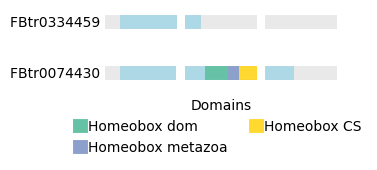

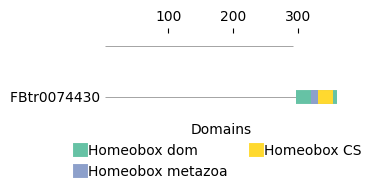

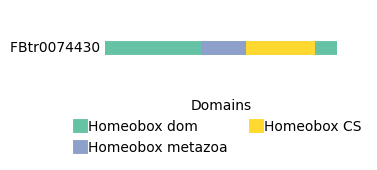

In [3]:
%%time
from chrov.domains import plot_domains as plot_forms
# from dups.viz import plot_forms

for biotype in ["t","p"]:
    for layout in [None, "blocks"]:
        fig, ax = plt.subplots(
            figsize=[3, figh],
        )
        plot_forms(
            gene_id=gene_id,
            species=species,
            ensembl_release=ensembl_release,
            biotype=biotype,
            layout=layout,
            # protein_coding=protein_coding,
            # force=True,
            return_data=True,
            data=None,
            
            ax=ax,
        )

In [4]:
# Re-enable logging
# logging.disable(logging.NOTSET)

CPU times: user 1.29 s, sys: 218 ms, total: 1.5 s
Wall time: 1.25 s


<timed exec>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.


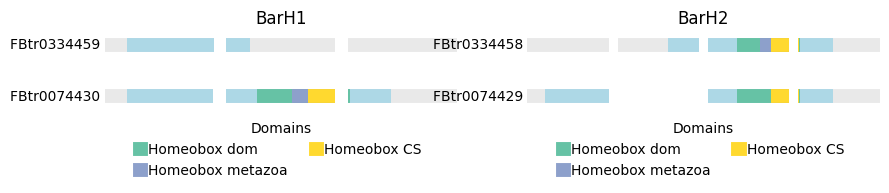

In [5]:
%%time
fig, axs = plt.subplots(
    1,
    len(paralogs),
    figsize=[5 * len(paralogs), figh],
)

for i, (title, gene_id) in enumerate(paralogs.items()):
    ax = axs[i]
    plot_forms(
        gene_id=gene_id,
        species=species,
        ensembl_release=ensembl_release,
        biotype="t",
        layout="blocks",
        # protein_coding=protein_coding,
        ax=ax,
        # kws_legend=dict(
        #     title='Domains',
        #     ncol=2,
        # )
    )
    ax.set(title=title)
    # break
plt.tight_layout()